**Importing Libraries**

In [264]:
import pandas as pd
import numpy as np

import os
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Importing Data**

In [265]:
df = pd.read_csv("loan.csv")

**Data Dimensions**

In [266]:
df.shape

(39717, 111)

There are 39717 rows and 111 columns in the dataframe

**Cleaning the data**

In [267]:
#Drop columns with greater than 50% missing values
missing_values = round(100*(df.isnull().sum()/len(df.index)), 2)
m_val = missing_values[missing_values > 50]
len(m_val)

57

There are 57 columns with greater than 50% nulls which can be deleted.

In [268]:
df.drop(columns=m_val.keys(),axis=1, inplace=True)
df.shape

(39717, 54)

After dropping the columns now there are 54 columns

In [269]:
#Drop duplicate rows if any
df.drop_duplicates()
df.shape

(39717, 54)

There are no duplicate rows in the data

In [270]:
temp = df.isnull().sum(axis=1)
temp.describe()

count    39717.000000
mean         0.439510
std          0.620915
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
dtype: float64

There are no rows with more than 6 missing values. Hence no rows to be deleted.

**Data Analysis**

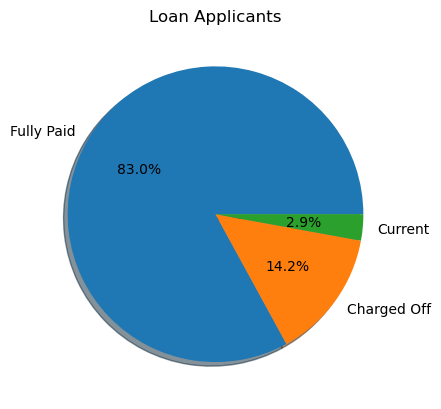

In [271]:

values = pd.Series(df['loan_status'])
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.title("Loan Applicants")
plt.pie(v_counts, labels=v_counts.index, autopct='%1.1f%%', shadow=True);

 
14.2% out of total loan applicants have difficulties in repaying loans.

In [272]:
print(df['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


In [273]:
#Add a column "Defaulter" which is 1 if the loan is charged off and 0 if it is fully paid.
df["Defaulter"] = (df["loan_status"] == "Charged Off").astype(int)


In [274]:
df_grade_Defaulter = df.loc[df["Defaulter"] == 1,'grade']
df_gradepercent = df_grade_Defaulter.value_counts()* 100 /df["grade"].value_counts() 


<AxesSubplot:xlabel='Grade', ylabel='% of Defaulters'>

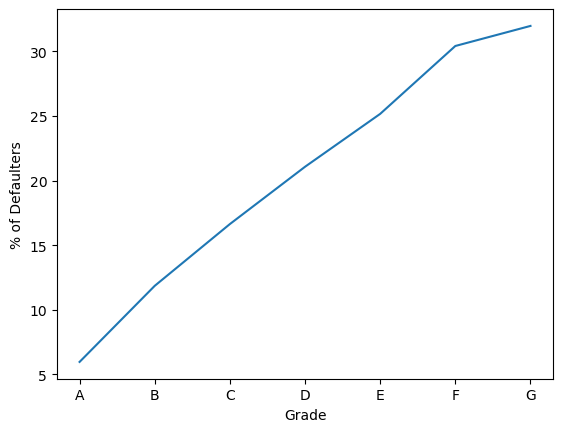

In [275]:
df_gradepercent.plot(xlabel="Grade", ylabel="% of Defaulters")

The percentage of Defaulters is directly related to the grade of the applicant.

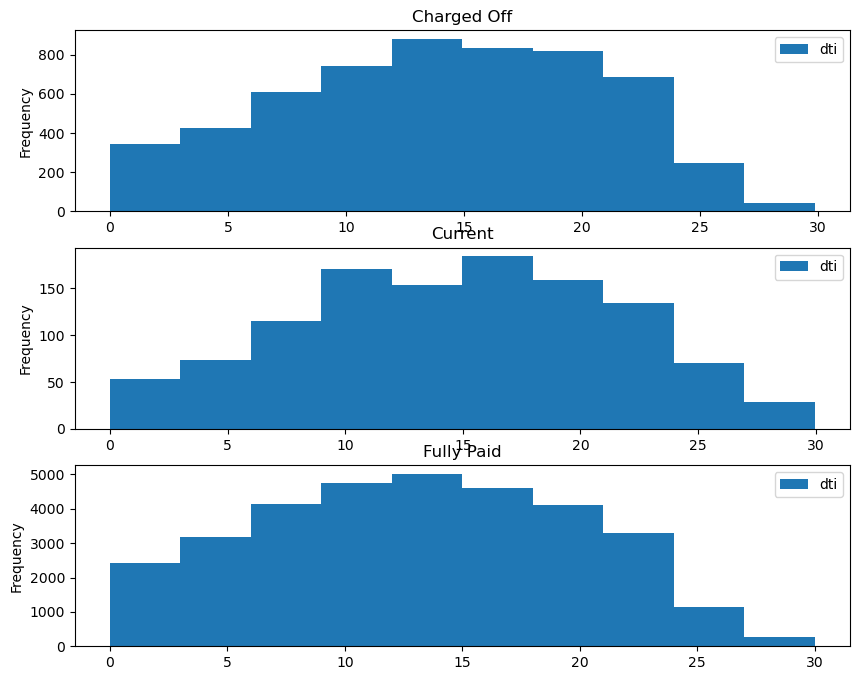

In [276]:
ax = df.plot.hist(column=["dti"], by="loan_status", xlabel="dti", figsize=(10, 8))

The debt to income ratio for loan applicants who are Defaulters is no different than the other customers.

In [277]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'Defaulter'],
      dtype='object')

In [278]:
df_inc_def = df.loc[df["Defaulter"] == 1,'annual_inc']


<AxesSubplot:title={'center':'Defaulter'}>

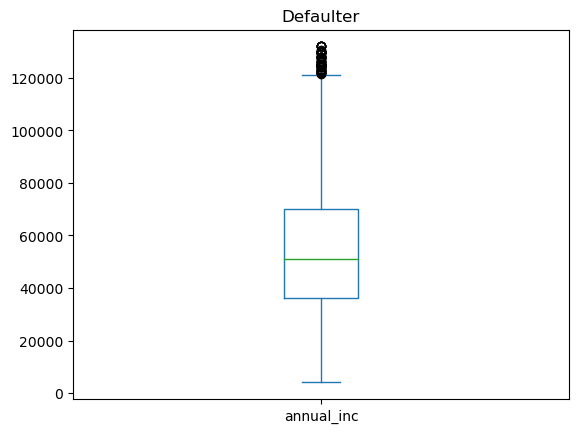

In [280]:
#Remove outlier
Q1 = df_inc_def.quantile(0.25)
Q3 = df_inc_def.quantile(0.75)
IQR = Q3 - Q1

df_inc_def = df_inc_def[~((df_inc_def < (Q1 - 1.5 * IQR)) |(df_inc_def > (Q3 + 1.5 * IQR)))]
df_inc_def.plot(kind="box", title="Defaulter")


In [232]:
df_inc_def.describe()

count      5367.000000
mean      55676.891137
std       25516.521797
min        4080.000000
25%       36000.000000
50%       51200.000000
75%       70000.000000
max      132000.000000
Name: annual_inc, dtype: float64

In [233]:
df_inc_def.shape

(5367,)

In [234]:
df_inc_fp = df.loc[df["Defaulter"] == 0,'annual_inc']
df_inc_fp.shape

(34090,)

<AxesSubplot:title={'center':'Fully Paid'}>

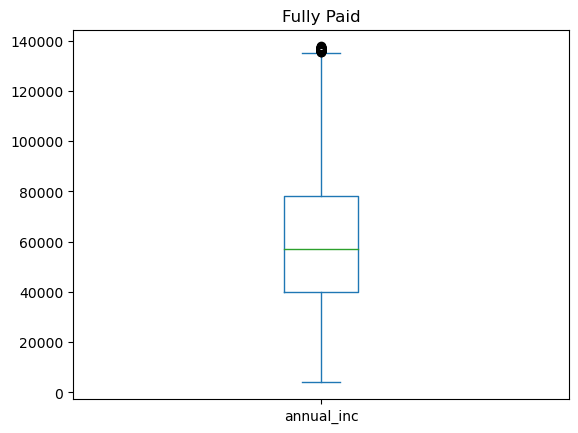

In [282]:
#Remove outlier
Q1 = df_inc_fp.quantile(0.25)
Q3 = df_inc_fp.quantile(0.75)
IQR = Q3 - Q1

df_inc_fp = df_inc_fp[~((df_inc_fp < (Q1 - 1.5 * IQR)) |(df_inc_fp > (Q3 + 1.5 * IQR)))]
df_inc_fp.plot(kind="box", title="Fully Paid")



In [236]:
df_inc_fp.describe()

count     32464.000000
mean      62202.952289
std       28420.988239
min        4000.000000
25%       40000.000000
50%       57600.000000
75%       80000.000000
max      147000.000000
Name: annual_inc, dtype: float64

The distribution of income amongst charged off customers and fully paid is very similar.

In [237]:
#plt.hist(df_inc_def, bins=10, alpha=0.5, label='Charged Off')
#plt.hist(df_inc_fp, bins=10, alpha=0.5, label='Fully Paid')
#plt.legend(loc='upper right')
#plt.show()

Pair plot between amount variables

In [238]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

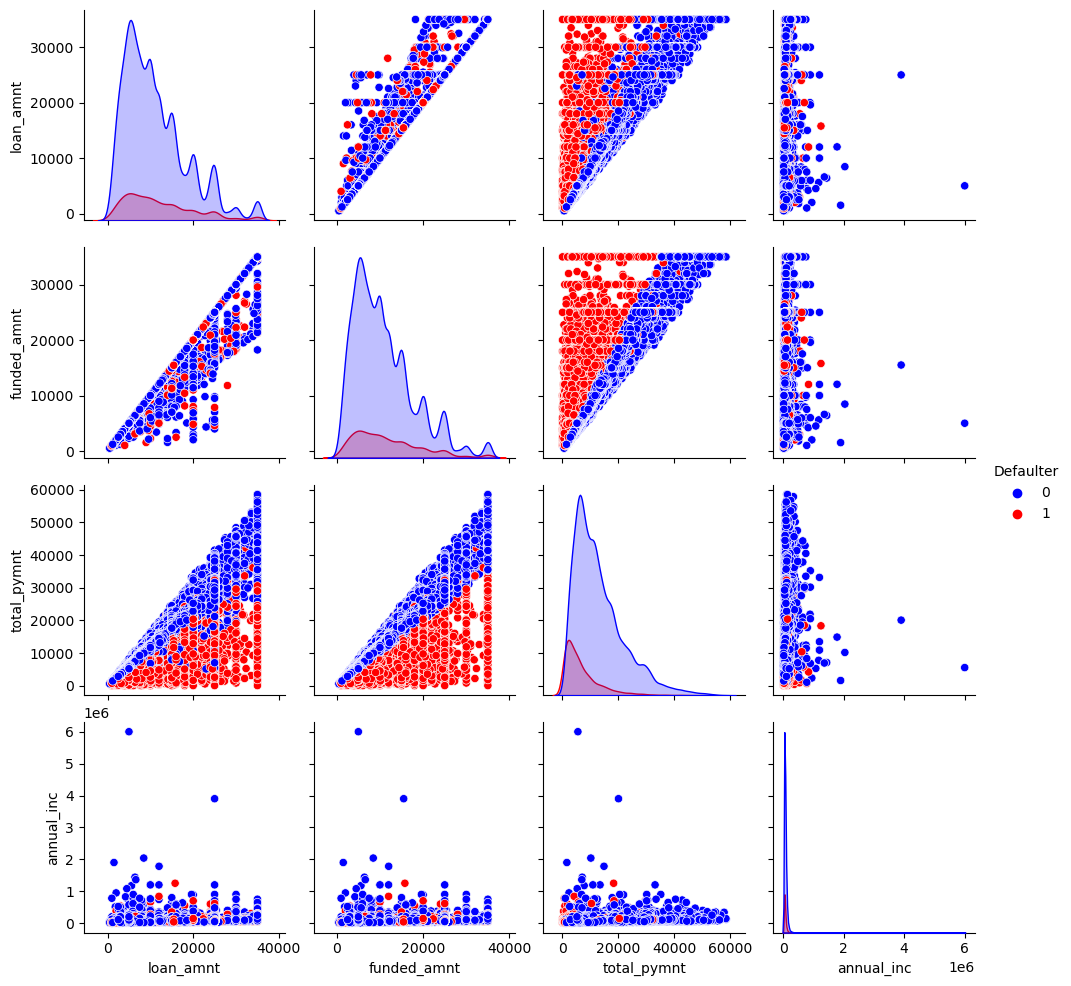

In [239]:
amt = df[[ "loan_amnt","funded_amnt", "total_pymnt","annual_inc","Defaulter" ]]

sns.pairplot(amt,hue="Defaulter",palette=["b","r"])
plt.show()

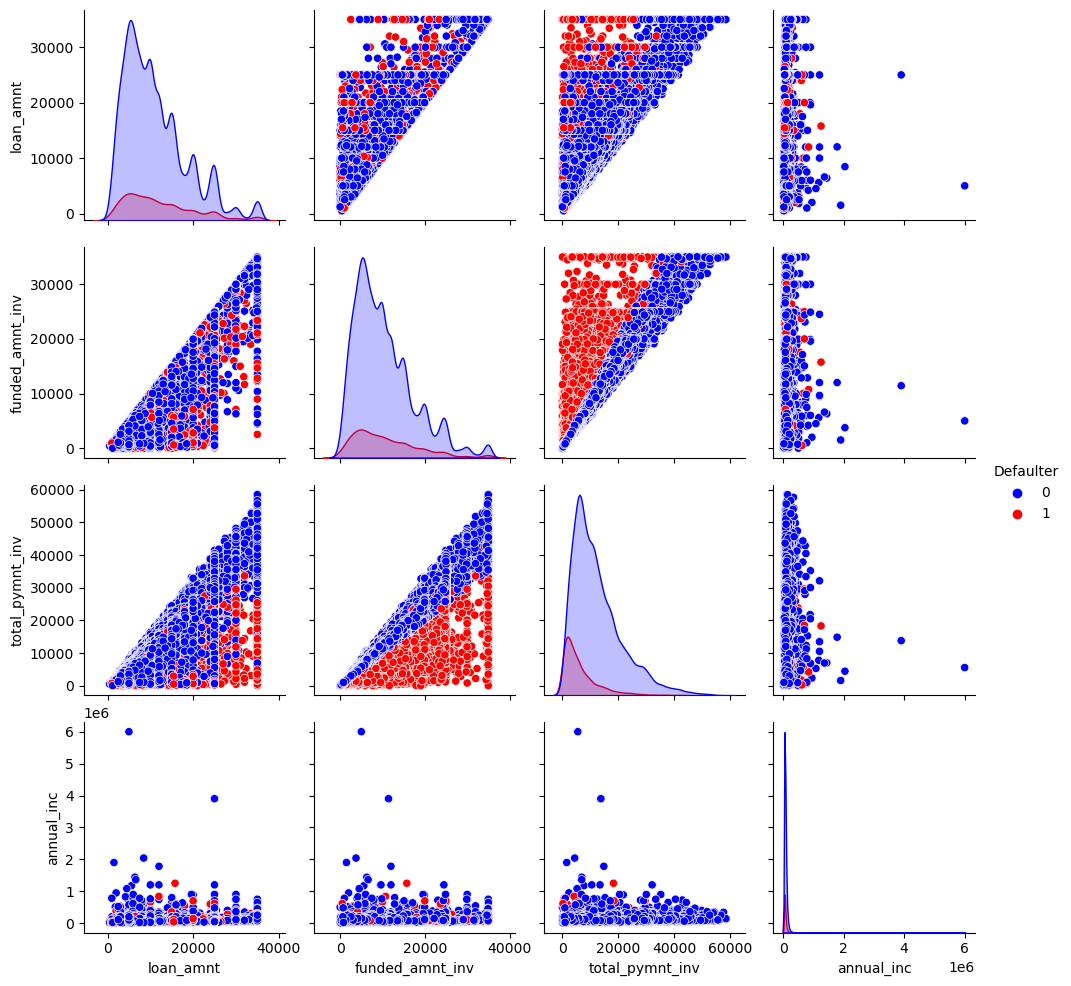

In [240]:
amt = df[[ "loan_amnt","funded_amnt_inv", "total_pymnt_inv","annual_inc","Defaulter" ]]

sns.pairplot(amt,hue="Defaulter",palette=["b","r"])
plt.show()

In [241]:
df_home_def = df.loc[df["Defaulter"] == 1,'home_ownership']
df_home_def.value_counts()

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64

In [242]:
df_home_fp = df.loc[df["Defaulter"] == 0,'home_ownership']
df_home_fp.value_counts()

RENT        16060
MORTGAGE    15332
OWN          2615
OTHER          80
NONE            3
Name: home_ownership, dtype: int64

In [243]:
values_def = pd.Series(df_home_def)
v_counts_def = values_def.value_counts()
v_counts_def

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64

In [244]:
sizes = v_counts_def.tolist()
sizes

[2839, 2327, 443, 18]

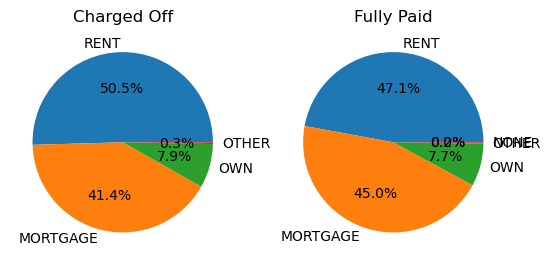

In [245]:

labels = v_counts_def.index
sizes = v_counts_def.tolist()

fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
plt.title("Charged Off")
plt.pie(sizes, labels=labels, autopct='%1.1f%%')


labels1 = v_counts_fp.index
sizes1 = v_counts_fp.tolist()

plt.subplot(1, 2, 2)
plt.title("Fully Paid")
plt.pie(sizes1, labels=labels1, autopct='%1.1f%%')
plt.show()

In [262]:
temp_df=df[['inq_last_6mths','open_acc','delinq_2yrs','revol_bal','revol_util' ,'total_acc','Defaulter']]


df2 = temp_df.corr()
df2

,inq_last_6mths,open_acc,delinq_2yrs,revol_bal,total_acc,Defaulter
inq_last_6mths,1.000000,0.091713,0.008091,-0.022381,0.111499,0.071717
open_acc,0.091713,1.000000,0.011656,0.288964,0.686635,-0.010742
delinq_2yrs,0.008091,0.011656,1.000000,-0.055125,0.067892,0.019904
revol_bal,-0.022381,0.288964,-0.055125,1.000000,0.313602,0.003369
total_acc,0.111499,0.686635,0.067892,0.313602,1.000000,-0.023563
Defaulter,0.071717,-0.010742,0.019904,0.003369,-0.023563,1.000000


<AxesSubplot:>

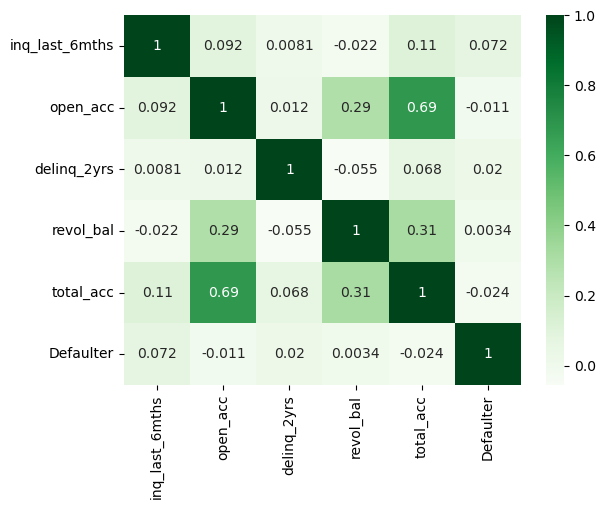

In [263]:
sns.heatmap(df2,cmap = "Greens", annot=True)